This is an introduction to evolutionary computation in Python with NumPy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rdm

In [3]:
class Candidate:
    def __init__(self, value, fit):
        self.value = value
        self.fit = fit

    def __gt__(self, mutation2):
        return self.fit > mutation2.fit

    def __str__(self):
        return "Mutation-Fitness: " + str(self.fit)

def sphere(value):
    return np.dot(value.T, value)

def crossover(parent1, parent2):
    return (parent1.value + parent2.value) / 2


In [4]:
n = 5
x = 2 * np.ones(n)

The first generation is: Mutation-Fitness: 22.79740794114104, Mutation-Fitness: 36.82157653375003, Mutation-Fitness: 5.820343574859413, Mutation-Fitness: 30.93658116425634, Mutation-Fitness: 35.078949545802935, Mutation-Fitness: 31.026437693605516, Mutation-Fitness: 26.623411645971743, Mutation-Fitness: 22.766564165024608, Mutation-Fitness: 23.938560710251046, Mutation-Fitness: 22.44431058581097, Mutation-Fitness: 34.28337411946547, Mutation-Fitness: 30.34261412171347, Mutation-Fitness: 12.414129421758393, Mutation-Fitness: 20.734580078459505, Mutation-Fitness: 19.629163494660084, Mutation-Fitness: 40.23270813305785, Mutation-Fitness: 11.281951730745186, Mutation-Fitness: 32.253859688748655, Mutation-Fitness: 33.3344999352675



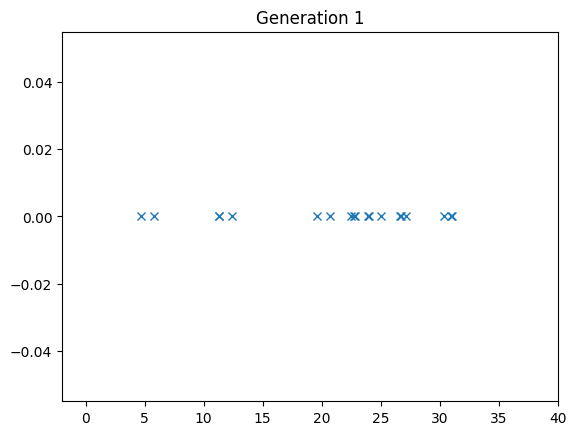

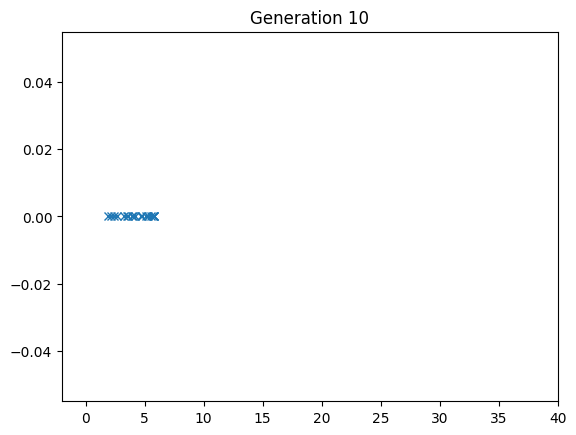

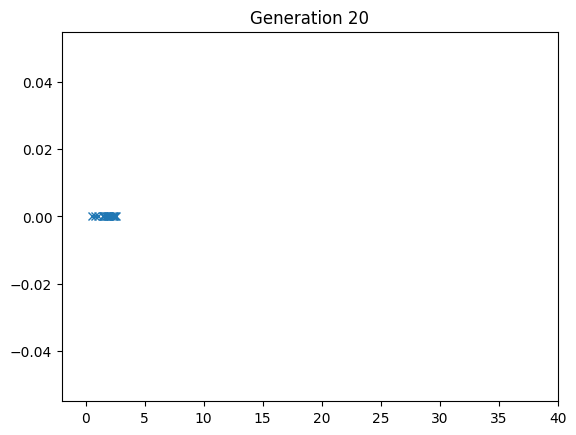

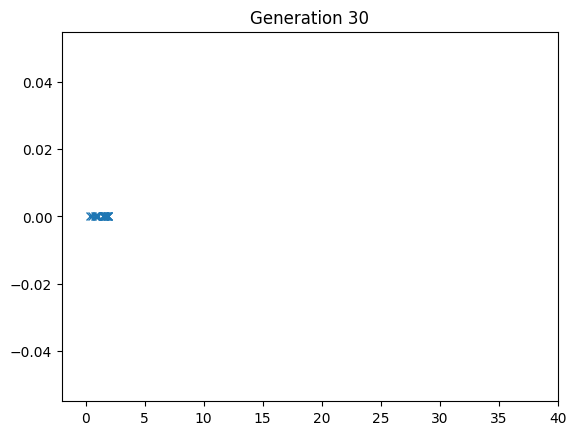

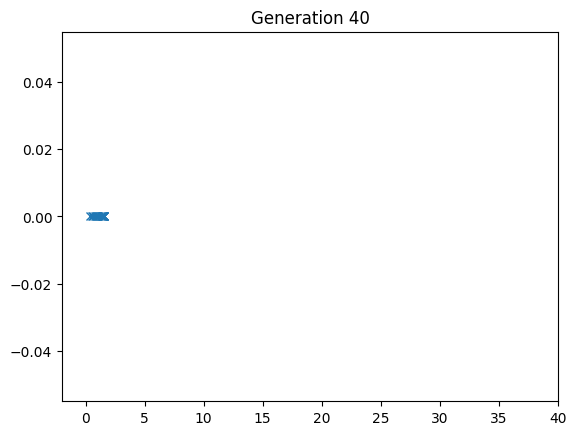

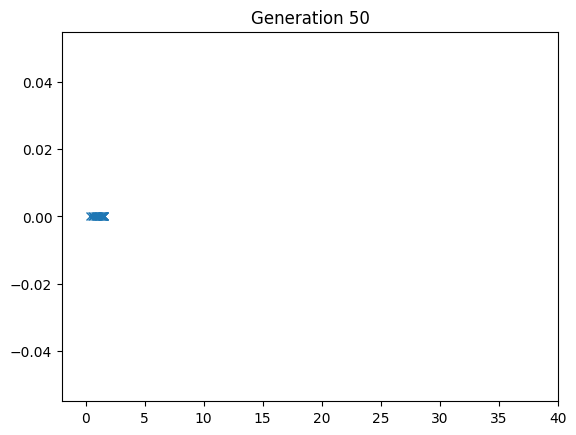

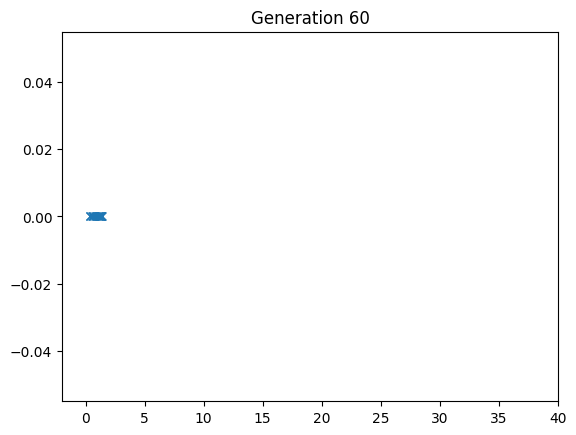

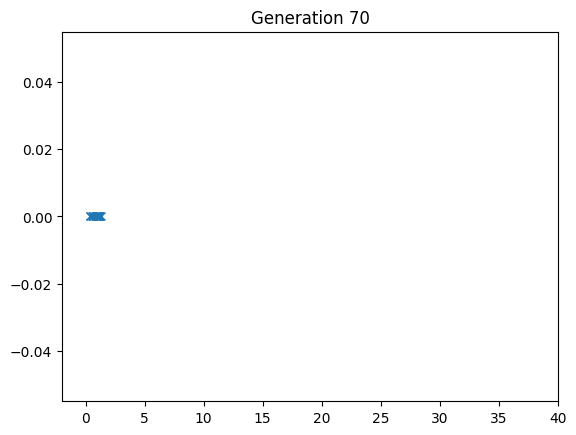

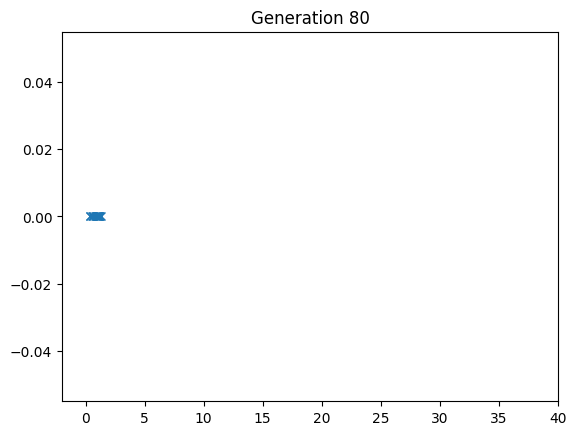

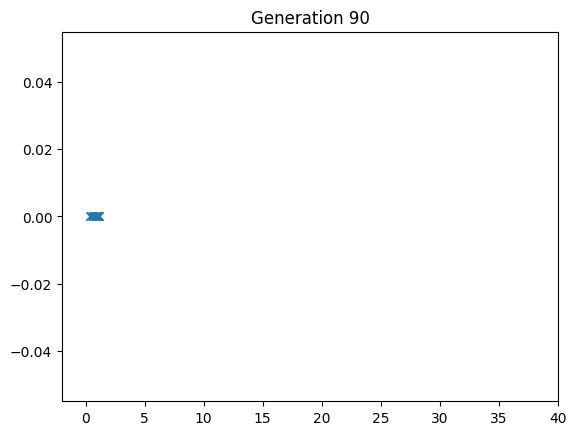

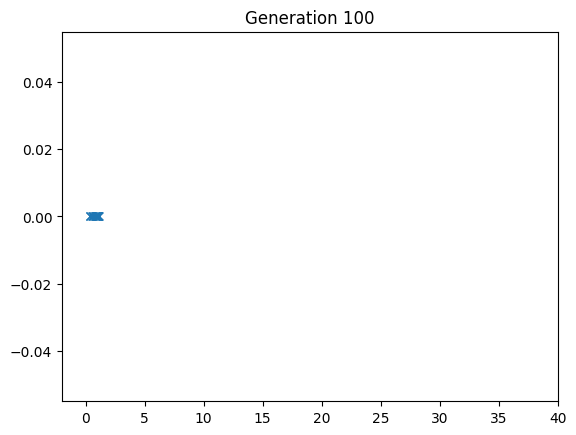

The last generation is: Mutation-Fitness: 0.37104180412962046, Mutation-Fitness: 0.4038420983912384, Mutation-Fitness: 0.5415072038457711, Mutation-Fitness: 0.5894610799159434, Mutation-Fitness: 0.5949373714830343, Mutation-Fitness: 0.7857409808357788, Mutation-Fitness: 0.814225424514901, Mutation-Fitness: 0.8458727741381032, Mutation-Fitness: 0.8672715303371995, Mutation-Fitness: 0.872553285142999, Mutation-Fitness: 0.9815925189994581, Mutation-Fitness: 0.9844393962914397, Mutation-Fitness: 1.0113439275159632, Mutation-Fitness: 1.0435532125024842, Mutation-Fitness: 1.0473497851592204, Mutation-Fitness: 1.0584020954792417, Mutation-Fitness: 1.0606645874734015, Mutation-Fitness: 1.092361434875912, Mutation-Fitness: 1.120996007942475


In [5]:
generation = 1
sigma = 1.0
parents_mu = 20
mutations_lambda = 10
population = []

# Generate initial mu parents for population
for i in range(1, parents_mu):
    x_ = x + sigma * np.random.randn(n)
    fitness = sphere(x_)

    candidate = Candidate(x_, fitness)
    population.append(candidate)
print("The first generation is:", ", ".join([str(m) for m in population]))
print()

# Compute 100 generations
while generation <= 100:
    # Crossover with 2 parents (p=2) and intermediate recombination by mean value (repeat for lambda number of mutations)
    for i in range(1, mutations_lambda):
        first_parent = rdm.randrange(len(population))
        second_parent = rdm.randrange(len(population))
        mean_value = crossover(population[first_parent], population[second_parent])
        # Mutation
        mean_value_ = mean_value + sigma * np.random.randn(n)
        fitness_ = sphere(mean_value_)

        candidate = Candidate(mean_value_, fitness_)
        population.append(candidate)

    # TODO: Try to implement Rechenberg with a 5-step generation window (larger than 1/5 with s/gen-window)
    # TODO: Reset the success counter to empty after 5 steps to do it again

    # Now select the best (minimal) mu parents/mutations out of complete population (parent + mutations)
    population.sort()
    population = population[:parents_mu - 1]

    # Show actual distribution of fitness among population
    if generation == 1 or generation % 10 == 0:
        plt.plot([p.fit for p in population], np.zeros_like(population), 'x')
        plt.xlim(-2, 40)
        plt.title('Generation ' + str(generation))
        plt.show()

    generation += 1

# Return the last generation
print("The last generation is:", ", ".join([str(m) for m in population]))